<a href="https://colab.research.google.com/github/issaq96/Prediction-of-Product-Sales/blob/main/prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prediction of Product Sales
* -Issa Qahoush

## "Project Overview"

## "Load and Inspect Data"

### "Imports"

In [1]:
import pandas as pd
import numpy as np

### "Load data"

In [2]:
fname = "/content/drive/MyDrive/AXSOSACADEMY/Github/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.shape

(8523, 12)

### there are 12 columns
### there are 8523 rows



#### we have different data types as shown in the table below : object, float and int.

In [5]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## "Clean Data"

### "Checking for dublicates"

In [6]:
duplicated_rows = df.duplicated()
duplicated_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [7]:
df.duplicated().sum()

np.int64(0)

#### as shown in the result above there are no duplicated rows

### "Checking for missing values"

In [8]:
missing_values_count = df.isna().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


### " Dealing with missing values "
#### Item_Weight missing values can be replaced by the median

In [9]:
item_weight_median = df["Item_Weight"].median()


df["Item_Weight"]=df["Item_Weight"].fillna(item_weight_median)


#### Outlet_Size missing values will be replaced by the word "MISSING"

In [10]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(value = 'Unknown')

#### "Checking for any missing values"

In [11]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#### "Time to explore any inconsistancies"

In [12]:
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


#### " it is noted that Item_Fat_Content has mulitple ways to represent the same item fat content "

#### LF and low fat will be replaced to Low fat and reg to Regular

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({ "LF": "Low Fat","low fat": "Low Fat","reg": "Regular"})
df["Item_Fat_Content"].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [14]:
df.describe(include=["number"]).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## "Exploratory Data Analysis"

## creating Heatmap Correlation for numerical variables to understannd the correlation between the data


In [26]:
#importing matplotlib and seaborn to generate graph for visiualization
import matplotlib.pyplot as plt
import seaborn as sns

# finding numerical columns
numerical_columns = df.select_dtypes(include=["number"])
numerical_columns



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [27]:
corr = numerical_columns.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


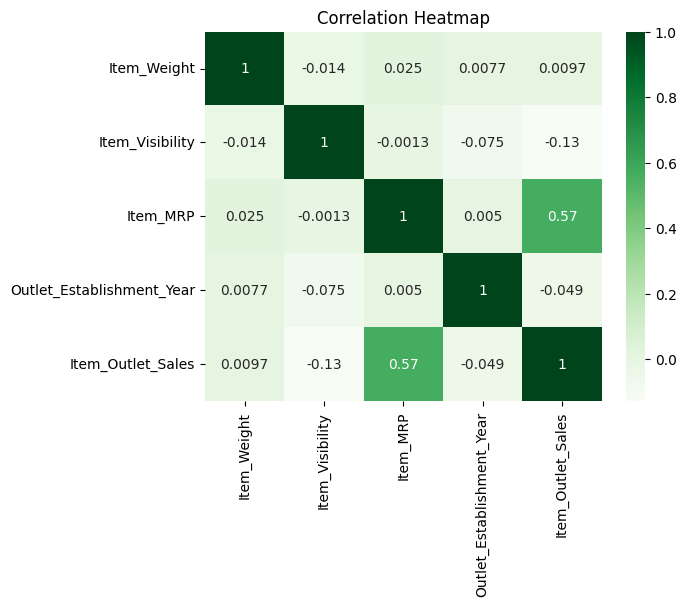

In [28]:
# creating a heatmap
ax = sns.heatmap(corr, cmap="Greens", annot=True);
ax.set_title("Correlation Heatmap");

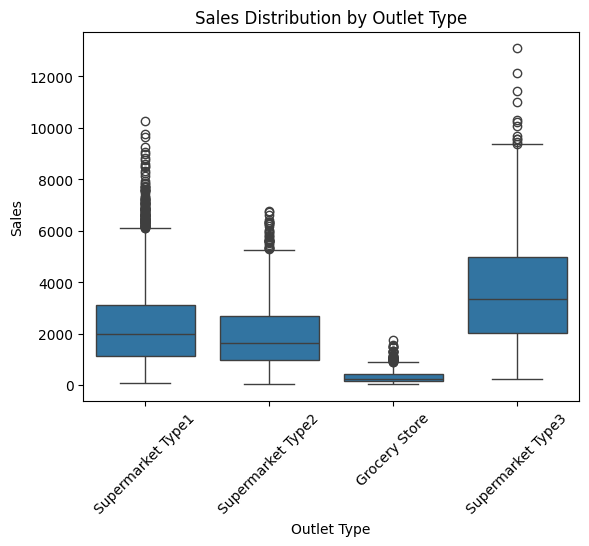

In [32]:
#Boxplot: Sales by Outlet Type for Showing distribution, central tendency, and outliers across categories.
sns.boxplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales")
plt.xlabel("Outlet Type")
plt.ylabel("Sales")
plt.title("Sales Distribution by Outlet Type");
plt.xticks(rotation=45);

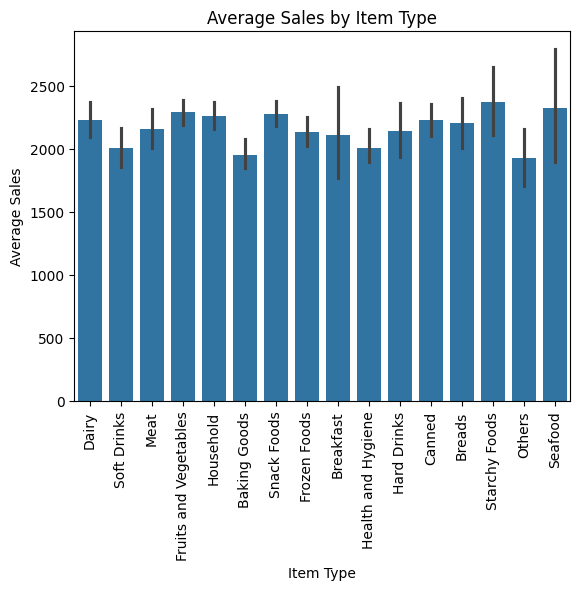

In [34]:
# Barplot to see the average Sales by Item Type
sns.barplot(data=df, x="Item_Type", y="Item_Outlet_Sales")
plt.xlabel("Item Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Item Type")
plt.xticks(rotation=90);



/tmp/ipython-input-2180623679.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha="right");


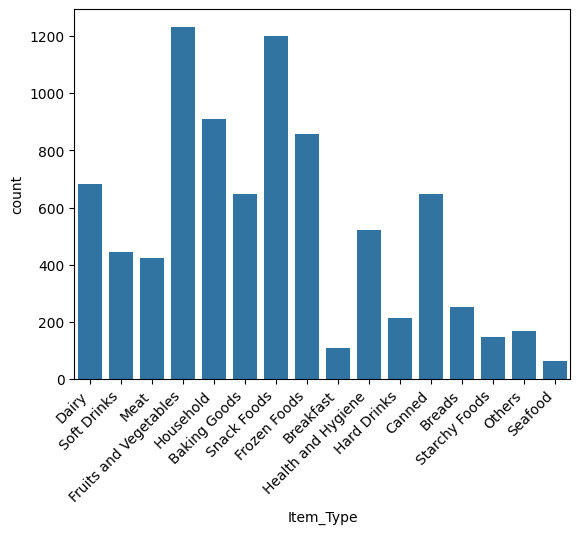

In [38]:
# countplots to view the frequency of each class of categorical features in dataset
ax = sns.countplot(x='Item_Type',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha="right");


## "Feature Inspection"